In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/AI/Faster_RCNN')

In [ ]:
f=open('table_annotation_with_unlv.txt','r')
lines=f.readlines()
lines=[line.strip() for line in lines]
f.close()

img_files=[line.split(',')[0] for line in lines]
img_files=list(set(img_files))#ensure unique elements...

In [ ]:
extra_data={}#for adding extra data on the txt files

##Smudging

In [ ]:
!mkdir Smudged_data

mkdir: cannot create directory ‘Smudged_data’: File exists


In [ ]:
# Note: Image name will be stored as "Smudge_OriginalName" to avoid confict
import cv2
import numpy as np
import glob

def basicTransform(img):
	_, mask = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
	img = cv2.bitwise_not(mask)
	return img

PATH_TO_DEST = "/content/drive/My Drive/AI/Faster_RCNN/Smudged_data"
#PATH_TO_ORIGIAL_IMAGES = "/content/drive/My Drive/Main Folder/Dataset/Orig_Image/"

img_files = img_files

total = len(img_files)
for count,i in enumerate(img_files):
  if i[-4]=='.':extension=i[-4:]
  else: extension=i[-5:]
  image_name = f'image{count+1}{extension}'

  if (count%10)==0:
    print("Progress : ",count,"/",total)
  img = cv2.imread(i)

  #print(type(img[0][0][0]))
  
  # Split the 3 channels into Blue,Green and Red
  b,g,r = cv2.split(img)
  
  # Apply Basic Transformation
  b = basicTransform(b)
  r = basicTransform(r)
  g = basicTransform(g)
  
  # Perform the distance transform algorithm
  b = cv2.distanceTransform(b, cv2.DIST_L2, 5)  # ELCUDIAN
  g = cv2.distanceTransform(g, cv2.DIST_L1, 5)  # LINEAR
  r = cv2.distanceTransform(r, cv2.DIST_C, 5)   # MAX

  # Normalize
  r = cv2.normalize(r, r, 0, 1.0, cv2.NORM_MINMAX)
  g = cv2.normalize(g, g, 0, 1.0, cv2.NORM_MINMAX)
  b = cv2.normalize(b, b, 0, 1.0, cv2.NORM_MINMAX)

  # Merge the channels
  dist = cv2.merge((b,g,r))
  dist = cv2.normalize(dist,dist, 0, 4.0, cv2.NORM_MINMAX)
  dist = cv2.cvtColor(dist, cv2.COLOR_BGR2GRAY)

  # In order to save as jpg, or png, we need to handle the Data
  # format of image
  data = dist.astype(np.float64) / 4.0
  data = 1800 * data # Now scale by 1800
  dist = data.astype(np.uint8)

  # Save to destination
  cv2.imwrite(PATH_TO_DEST+"/Smudge_"+image_name,dist)
  
  if i not in extra_data:
    extra_data[i]=[PATH_TO_DEST+"/Smudge_"+image_name]
  else:
    extra_data[i].append(PATH_TO_DEST+"/Smudge_"+image_name)

Progress :  0 / 1616
Progress :  10 / 1616
Progress :  20 / 1616
Progress :  30 / 1616
Progress :  40 / 1616
Progress :  50 / 1616
Progress :  60 / 1616
Progress :  70 / 1616
Progress :  80 / 1616
Progress :  90 / 1616
Progress :  100 / 1616
Progress :  110 / 1616
Progress :  120 / 1616
Progress :  130 / 1616
Progress :  140 / 1616
Progress :  150 / 1616
Progress :  160 / 1616
Progress :  170 / 1616
Progress :  180 / 1616
Progress :  190 / 1616
Progress :  200 / 1616
Progress :  210 / 1616
Progress :  220 / 1616
Progress :  230 / 1616
Progress :  240 / 1616
Progress :  250 / 1616
Progress :  260 / 1616
Progress :  270 / 1616
Progress :  280 / 1616
Progress :  290 / 1616
Progress :  300 / 1616
Progress :  310 / 1616
Progress :  320 / 1616
Progress :  330 / 1616
Progress :  340 / 1616
Progress :  350 / 1616
Progress :  360 / 1616
Progress :  370 / 1616
Progress :  380 / 1616
Progress :  390 / 1616
Progress :  400 / 1616
Progress :  410 / 1616
Progress :  420 / 1616
Progress :  430 / 1616

##Dilation

In [ ]:
!mkdir Dilated_data

mkdir: cannot create directory ‘Dilated_data’: File exists


In [ ]:
# Note: Image name will be stored as "Dilation_OriginalName" to avoid confict

import cv2
import glob
import numpy as np 

# DEFINE THE PATH
PATH_TO_DEST = "/content/drive/My Drive/AI/Faster_RCNN/Dilated_data"
#PATH_TO_ORIGIAL_IMAGES = "/content/drive/My Drive/Main Folder/Dataset/Orig_Image/"

# if the source directory have other files than images, use extenstion of image 
# to get the files ( for example *.png )
img_files = img_files
total = len(img_files)

# 2x2 Static kernal
kernal = np.ones((2,2),np.uint8)

for count,i in enumerate(img_files):
  if i[-4]=='.':extension=i[-4:]
  else: extension=i[-5:]
  image_name = f'image{count+1}{extension}'

  if (count%10)==0:
    print("Progress : ",count,"/",total)
  img = cv2.imread(i,0)
  _, mask = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
  dst = cv2.dilate(mask,kernal,iterations = 1)
  dst = cv2.bitwise_not(dst)
  dst = dst.astype(np.uint8)
  
  cv2.imwrite(PATH_TO_DEST+"/Dilation_"+image_name,dst)
  
  if i not in extra_data:
    extra_data[i]=[PATH_TO_DEST+"/Dilation_"+image_name]
  else:
    extra_data[i].append(PATH_TO_DEST+"/Dilation_"+image_name)

Progress :  0 / 1616
Progress :  10 / 1616
Progress :  20 / 1616
Progress :  30 / 1616
Progress :  40 / 1616
Progress :  50 / 1616
Progress :  60 / 1616
Progress :  70 / 1616
Progress :  80 / 1616
Progress :  90 / 1616
Progress :  100 / 1616
Progress :  110 / 1616
Progress :  120 / 1616
Progress :  130 / 1616
Progress :  140 / 1616
Progress :  150 / 1616
Progress :  160 / 1616
Progress :  170 / 1616
Progress :  180 / 1616
Progress :  190 / 1616
Progress :  200 / 1616
Progress :  210 / 1616
Progress :  220 / 1616
Progress :  230 / 1616
Progress :  240 / 1616
Progress :  250 / 1616
Progress :  260 / 1616
Progress :  270 / 1616
Progress :  280 / 1616
Progress :  290 / 1616
Progress :  300 / 1616
Progress :  310 / 1616
Progress :  320 / 1616
Progress :  330 / 1616
Progress :  340 / 1616
Progress :  350 / 1616
Progress :  360 / 1616
Progress :  370 / 1616
Progress :  380 / 1616
Progress :  390 / 1616
Progress :  400 / 1616
Progress :  410 / 1616
Progress :  420 / 1616
Progress :  430 / 1616

##Update txt records

In [ ]:
f=open('table_annotation_with_unlv.txt','r')
lines=f.readlines()
lines=[line.strip() for line in lines]
f.close()

In [ ]:
for i in range(10):print(lines[i])

/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-006-2.jpg,19,98,829,979,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-003-3.jpg,234,752,591,829,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-001-1.jpg,50,148,800,534,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-002-2.jpg,113,138,705,473,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-006-3.jpg,19,59,826,844,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-003-1.jpg,163,520,662,738,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-005-3.jpg,59,305,895,555,Table
/content/drive/My Drive/NRP 2020/modified/table_detection/icdar2013_images/training/us/us-005-1.jpg,59,186,459,675,Table
/content/drive/My Drive/NRP 202

In [ ]:
f=open('table_annotation_with_augmented.txt','w')
for line in lines:
  f.write(line+'\n')
  
  img=line.split(',')[0]
  others=','.join(line.split(',')[1:])
  for augmented_image in extra_data[img]:
    f.write(augmented_image+','+others+'\n')
f.close()

##In case the images get scaled

In [ ]:
from skimage import io
import cv2
import matplotlib.pyplot as plt
from numpy import array
def plot_bbox(img_url,boxes):#boxes is a list of [x1,y1,x2,y2]
  img = io.imread(img_url)
  if len(img.shape)==2:#greyscale image...
    full=[]
    for i in range(len(img)):
      row=[]
      for j in range(len(img[i])):
        row.append((img[i,j],img[i,j],img[i,j]))
      full.append(row)
    img=array(full)
  #height, width, channel = img.shape
  print(f"Image: {img.shape}")
  for (xmin,ymin,xmax,ymax) in boxes:
      class_name='Table'
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 3, (0,255,0), 5)
  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Image: (1100, 850, 3)
Coordinates: (19, 98), (829, 979)


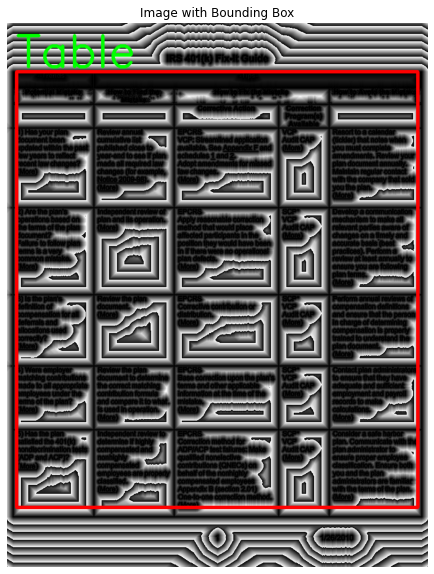

Image: (1100, 850, 3)
Coordinates: (19, 98), (829, 979)


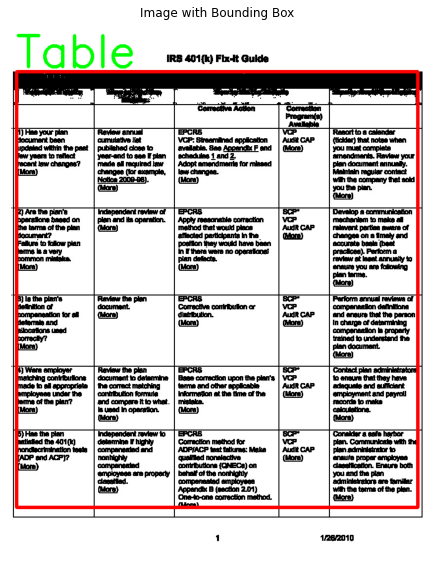


Image: (1170, 827, 3)
Coordinates: (234, 752), (591, 829)


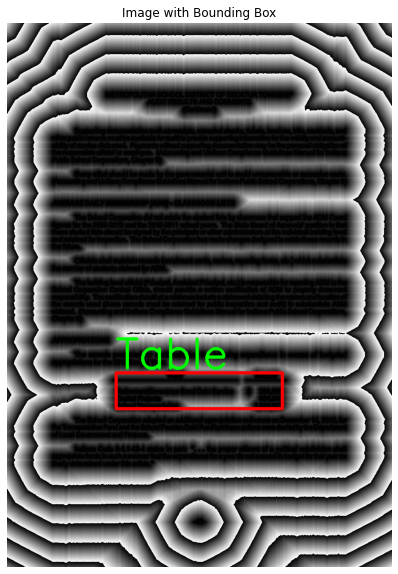

Image: (1170, 827, 3)
Coordinates: (234, 752), (591, 829)


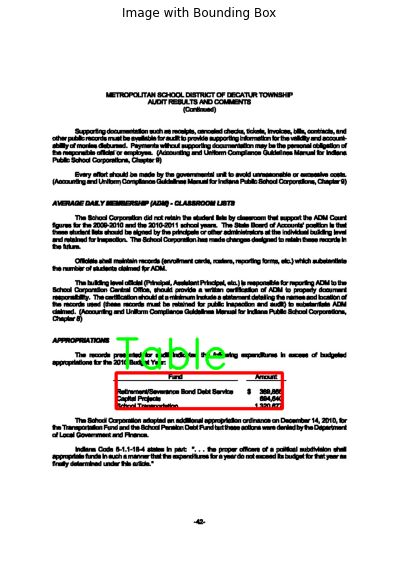


Image: (1100, 850, 3)
Coordinates: (50, 148), (800, 534)


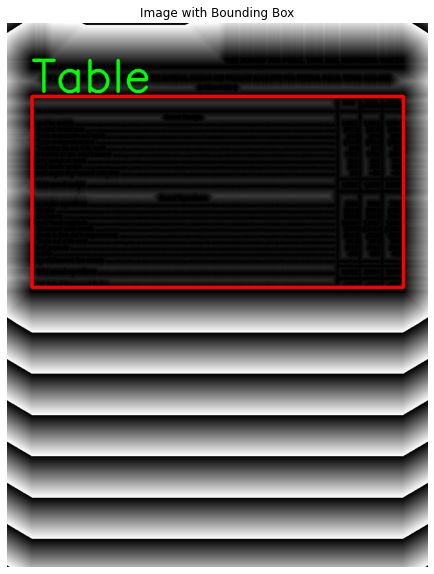

Image: (1100, 850, 3)
Coordinates: (50, 148), (800, 534)


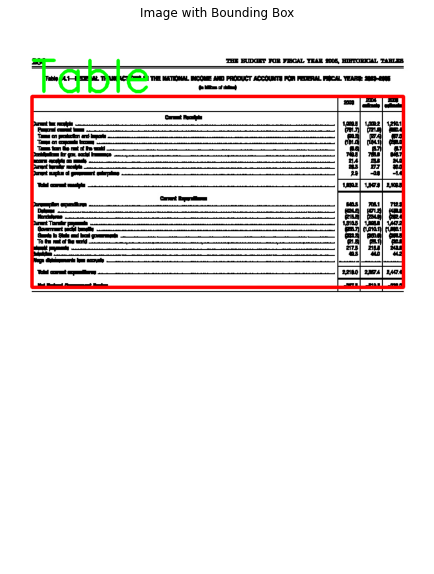


Image: (1100, 850, 3)
Coordinates: (113, 138), (705, 473)


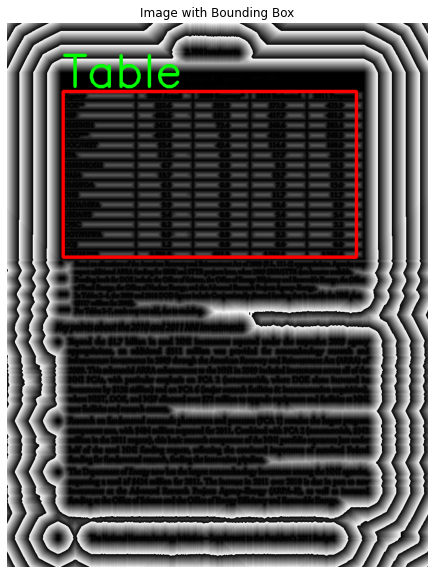

Image: (1100, 850, 3)
Coordinates: (113, 138), (705, 473)


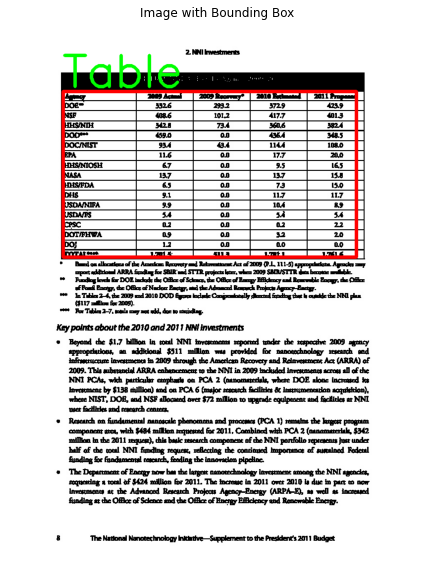


Image: (1100, 850, 3)
Coordinates: (19, 59), (826, 844)


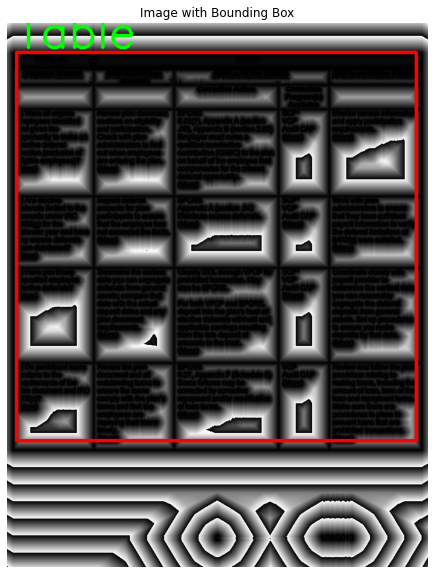

Image: (1100, 850, 3)
Coordinates: (19, 59), (826, 844)


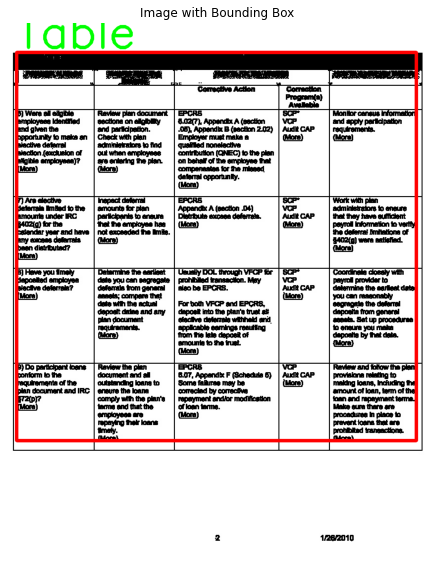

In [ ]:
for line in lines[:5]:
  img=line.split(',')[0]
  others=','.join(line.split(',')[1:])
  #print(img)
  #print(extra_data[img])
  #print(others)
  data=others.split(',')[:4]
  data=[int(i) for i in data]

  for item in extra_data[img]:
    plot_bbox(item,[data])
  print()